In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

datos = pd.read_csv('https://raw.githubusercontent.com/Unidad-Robotica-Dlab/molecular_dynamic/main/Data/energy_pot_50ns_E%3D0%2C2_75chol_x20.csv')


In [3]:
datos

,Average,Err.Est.,RMSD,Tot-Drift,RMSD.1
0,-321574,38,994.944,-218.6850,0.99
1,-321661,68,998.616,-444.7960,2.03
2,-321698,32,988.904,-191.4610,2.95
3,-321500,52,991.857,186.8910,1.33
4,-321693,51,994.556,-219.2880,1.60
5,-321696,61,1010.650,-241.7600,0.97
6,-321546,36,993.026,-780.8280,2.53
7,-321628,48,988.094,-199.6330,1.71
8,-321679,64,996.756,-402.1910,1.90
9,-321537,27,999.404,-46.5298,1.61


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Average    20 non-null     int64  
 1   Err.Est.   20 non-null     int64  
 2   RMSD       20 non-null     float64
 3   Tot-Drift  20 non-null     float64
 4   RMSD.1     20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 928.0 bytes


In [5]:
datos['Average']

0    -321574
1    -321661
2    -321698
3    -321500
4    -321693
5    -321696
6    -321546
7    -321628
8    -321679
9    -321537
10   -321676
11   -321670
12   -321744
13   -321663
14   -321613
15   -321640
16   -321570
17   -321572
18   -321691
19   -321588
Name: Average, dtype: int64

In [6]:
Average_nom=((datos['Average']-datos['Average'].min())/(datos['Average'].max()-datos['Average'].min()))

In [7]:
Average_nom

0     0.696721
1     0.340164
2     0.188525
3     1.000000
4     0.209016
5     0.196721
6     0.811475
7     0.475410
8     0.266393
9     0.848361
10    0.278689
11    0.303279
12    0.000000
13    0.331967
14    0.536885
15    0.426230
16    0.713115
17    0.704918
18    0.217213
19    0.639344
Name: Average, dtype: float64

In [8]:
datos['RMSD.1']

0     0.99
1     2.03
2     2.95
3     1.33
4     1.60
5     0.97
6     2.53
7     1.71
8     1.90
9     1.61
10    2.19
11    1.04
12    0.90
13    2.11
14    1.66
15    1.87
16    1.72
17    1.97
18    2.59
19    1.32
Name: RMSD.1, dtype: float64

In [9]:
RMSD_nom=(datos['RMSD.1']-datos['RMSD.1'].min())/(datos['RMSD.1'].max()-datos['RMSD.1'].min())

In [10]:
RMSD_nom

0     0.043902
1     0.551220
2     1.000000
3     0.209756
4     0.341463
5     0.034146
6     0.795122
7     0.395122
8     0.487805
9     0.346341
10    0.629268
11    0.068293
12    0.000000
13    0.590244
14    0.370732
15    0.473171
16    0.400000
17    0.521951
18    0.824390
19    0.204878
Name: RMSD.1, dtype: float64

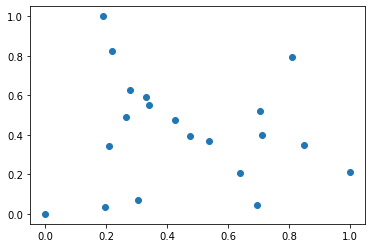

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(Average_nom, RMSD_nom)
plt.show()

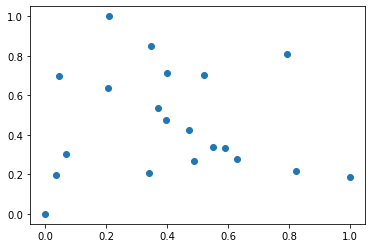

In [24]:
plt.scatter(RMSD_nom, Average_nom)
plt.show()

In [15]:
datos['Tot-Drift']

0    -218.6850
1    -444.7960
2    -191.4610
3     186.8910
4    -219.2880
5    -241.7600
6    -780.8280
7    -199.6330
8    -402.1910
9     -46.5298
10   -359.1230
11   -124.3490
12   -134.0190
13   -301.7550
14   -386.7490
15   -422.3230
16   -113.6630
17   -209.8070
18   -334.7080
19    -13.0658
Name: Tot-Drift, dtype: float64

In [17]:
TopDrift_nom=(datos['Tot-Drift']-datos['Tot-Drift'].min())/(datos['Tot-Drift'].max()-datos['Tot-Drift'].min())

In [18]:
TopDrift_nom

0     0.580895
1     0.347241
2     0.609027
3     1.000000
4     0.580272
5     0.557050
6     0.000000
7     0.600582
8     0.391268
9     0.758793
10    0.435772
11    0.678378
12    0.668385
13    0.495054
14    0.407225
15    0.370464
16    0.689420
17    0.590069
18    0.461002
19    0.793373
Name: Tot-Drift, dtype: float64

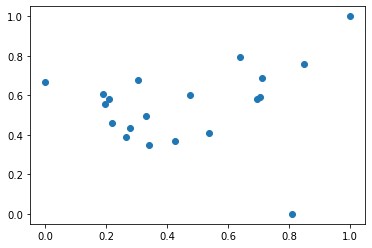

In [19]:
plt.scatter(TopDrift_nom, TopDrift_nom)
plt.show()

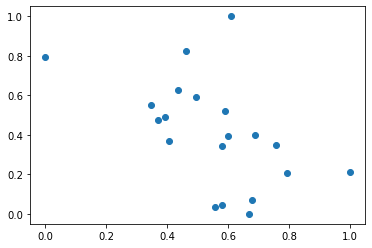

In [21]:
plt.scatter(TopDrift_nom, RMSD_nom)
plt.show()

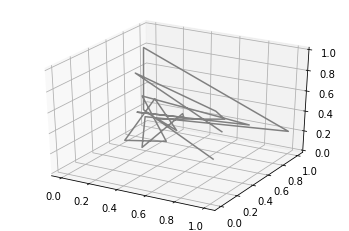

In [23]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = RMSD_nom
xline = Average_nom
yline = TopDrift_nom
ax.plot3D(xline, yline, zline, 'gray')